### 作業
目前已經學過許多的模型，相信大家對整體流程應該比較掌握了，這次作業請改用**手寫辨識資料集**，步驟流程都是一樣的，請試著自己撰寫程式碼來完成所有步驟

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import itertools
import os

dir_data = '.'
dir_train_feature = os.path.join(dir_data, 'train.csv')
dir_train_label = os.path.join(dir_data, 'trainLabels.csv')
dir_test_feature = os.path.join(dir_data, 'test.csv')

feature = pd.read_csv(dir_train_feature , header=None)
label = pd.read_csv(dir_train_label , header=None)
unknown_feature = pd.read_csv(dir_test_feature , header=None)

X_train , X_test , y_train , y_test = train_test_split(feature , label , test_size = 0.2)

In [3]:
classifier = lgb.LGBMClassifier()

classifier.fit(X_train , y_train)
y_pred = classifier.predict(X_test)

C:\Users\peng\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\peng\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\peng\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Recall metric in the testing dataset : 0.88
accuracy metric in the testing dataset : 0.8772987639433223


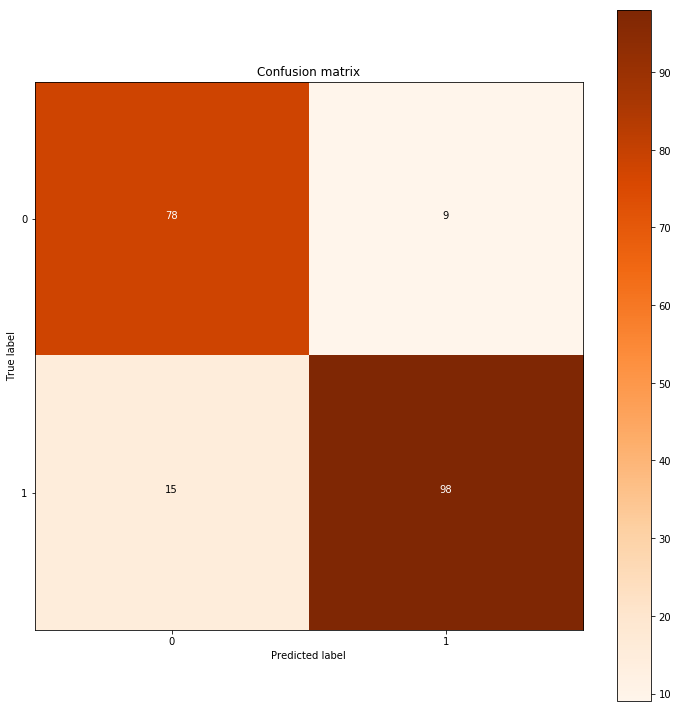

In [4]:
print("Recall metric in the testing dataset : {}"\
      .format(metrics.accuracy_score(y_test , y_pred)))
print("accuracy metric in the testing dataset : {}"\
      .format(metrics.precision_score(y_test , y_pred , average='macro')))


def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix = confusion_matrix(y_test , y_pred)
class_names = [i for i in range(0 , 2)]
plt.figure(figsize = (10 , 10))
plot_confusion_matrix(cnf_matrix , 
                      classes = class_names , 
                      title = 'Confusion matrix')
plt.show()

In [5]:
unknown_pred = classifier.predict(unknown_feature)

Id = np.arange(1 , 9001)
result = pd.DataFrame({'Id': Id, 'Solution': unknown_pred})
result.to_csv(os.path.join(dir_data , 'result.csv') , index=False)

C:\Users\peng\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


<img src="Day_048_HW.JPG" width="1000%">